# Introduction
  -Ce Dataset se concentre sur la compréhension des facteurs liés au comportement de fumer.
  -Il contient des informations sur la démographie des individus, leur éducation, leurs revenus et des facteurs régionaux.
  
Aperçu du Dataset :

    -gender : Le genre des individus (par exemple, Homme, Femme).
    
    -age : L'âge des individus. 
    
    -marital_status : Le statut relationnel des individus.
    
    -highest_qualification : Le niveau d'éducation des individus.
    
    -nationality : La nationalité des individus.
    
    -ethnicity : L'origine ethnique des individus. 
    
    -gross_income : Le niveau de revenu des individus. 
    
    -region : La région géographique où résident les individus. 
    
    -smoke : Statut d'fumeur avec les niveaux No et Yes
    
    -amt_weekends :Nombre de cigarettes fumées par jour en fin de semaine.
    
    -amt_weekdays : Nombre de cigarettes fumées par jour en semaine.
    
    -type :Type de cigarettes fumées avec niveaux : Paquet, Roulé à la main, Mixte/Principalement Paquet etMixte/Principalement Roulé à la main

    
Objectif :
L'objectif principal de l'analyse de ce Dataset est de comprendre les principales causes et facteurs influençant le comportement de fumer chez les individus. En examinant les facteurs démographiques, socio-économiques et régionaux, nous visons à identifier les motifs et corrélations qui contribuent de manière significative aux habitudes de fumer.

lien Dataset:https://www.kaggle.com/datasets/utkarshx27/smoking-dataset-from-uk/data

1)Installation de bibliothèques

In [160]:
pip install pycaret 

Note: you may need to restart the kernel to use updated packages.


In [161]:
from pycaret.utils import version
version()


'3.3.2'

In [162]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [163]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Exploratory Data Analysis (EDA) 

In [165]:
#Chargement du Dataset
df = pd.read_csv(r'C:\Users\khali\OneDrive\Desktop\sem 2\DataSets\smoking.csv')

In [166]:
df.head(10)

,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,1,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,3,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,4,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,5,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
5,6,Female,37,Married,GCSE/O Level,British,White,"15,600 to 20,800",The North,No,NaN,NaN,NaN
6,7,Male,53,Married,Degree,British,White,"Above 36,400",The North,Yes,6.0,6.0,Packets
7,8,Male,44,Single,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
8,9,Male,40,Single,GCSE/CSE,English,White,"2,600 to 5,200",The North,Yes,8.0,8.0,Hand-Rolled
9,10,Female,41,Married,No Qualification,English,White,"5,200 to 10,400",The North,Yes,15.0,12.0,Packets


In [167]:
df.tail(10)

,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
1681,1682,Male,53,Single,No Qualification,Scottish,White,"20,800 to 28,600",Scotland,No,NaN,NaN,NaN
1682,1683,Female,63,Married,No Qualification,British,White,Refused,Scotland,No,NaN,NaN,NaN
1683,1684,Male,35,Married,No Qualification,Scottish,White,"10,400 to 15,600",Scotland,Yes,3.0,12.0,Packets
1684,1685,Male,78,Widowed,No Qualification,Scottish,White,Refused,Scotland,No,NaN,NaN,NaN
1685,1686,Female,31,Single,Other/Sub Degree,Scottish,White,"5,200 to 10,400",Scotland,No,NaN,NaN,NaN
1686,1687,Male,22,Single,No Qualification,Scottish,White,"2,600 to 5,200",Scotland,No,NaN,NaN,NaN
1687,1688,Female,49,Divorced,Other/Sub Degree,English,White,"2,600 to 5,200",Scotland,Yes,20.0,20.0,Hand-Rolled
1688,1689,Male,45,Married,Other/Sub Degree,Scottish,White,"5,200 to 10,400",Scotland,No,NaN,NaN,NaN
1689,1690,Female,51,Married,No Qualification,English,White,"2,600 to 5,200",Scotland,Yes,20.0,20.0,Packets
1690,1691,Male,31,Married,Degree,Scottish,White,"10,400 to 15,600",Scotland,No,NaN,NaN,NaN


In [168]:
df.shape

(1691, 13)

In [169]:
# Vérifier le type de chaque colonne
df.dtypes

Unnamed: 0                 int64
gender                    object
age                        int64
marital_status            object
highest_qualification     object
nationality               object
ethnicity                 object
gross_income              object
region                    object
smoke                     object
amt_weekends             float64
amt_weekdays             float64
type                      object
dtype: object

In [170]:
#Supprimer le unnamed column
df = df.drop(df.columns[df.columns.str.contains('Unnamed', case=False)], axis=1)

Vérification des Valeurs Uniques

In [171]:
df["gender"].value_counts()

gender
Female    965
Male      726
Name: count, dtype: int64

In [172]:
df["age"].value_counts()

age
40    43
34    40
31    38
42    37
33    36
      ..
90     3
91     2
93     2
95     1
97     1
Name: count, Length: 79, dtype: int64

In [173]:
df["marital_status"].value_counts()

marital_status
Married      812
Single       427
Widowed      223
Divorced     161
Separated     68
Name: count, dtype: int64

In [174]:
df["highest_qualification"].value_counts()

highest_qualification
No Qualification     586
GCSE/O Level         308
Degree               262
Other/Sub Degree     127
Higher/Sub Degree    125
A Levels             105
GCSE/CSE             102
ONC/BTEC              76
Name: count, dtype: int64

In [175]:
df["gross_income"].value_counts()

gross_income
5,200 to 10,400     396
10,400 to 15,600    268
2,600 to 5,200      257
15,600 to 20,800    188
20,800 to 28,600    155
Under 2,600         133
Refused             108
Above 36,400         89
28,600 to 36,400     79
Unknown              18
Name: count, dtype: int64

In [176]:
df["smoke"].value_counts()

smoke
No     1270
Yes     421
Name: count, dtype: int64

Traitement des Valeurs Manquantes

In [177]:
# Supprimer les lignes avec des valeurs nulles dans la colonne 'gender'
df = df.dropna(subset=['gender'])

In [178]:
# Supprimer les lignes avec des valeurs nulles dans la colonne 'marital_status'
df = df.dropna(subset=['marital_status'])

In [179]:
# Supprimer les lignes avec des valeurs nulles dans la colonne 'age'
df = df.dropna(subset=['age'])

In [180]:
# Supprimer les lignes avec des valeurs nulles dans la colonne 'highest_qualification'
df = df.dropna(subset=['highest_qualification'])

In [181]:
# Supprimer les lignes avec des valeurs nulles dans la colonne 'gross_income'
df = df.dropna(subset=['gross_income'])

In [182]:
# Supprimer les lignes avec des valeurs nulles dans la colonne 'smoke'
df = df.dropna(subset=['smoke'])

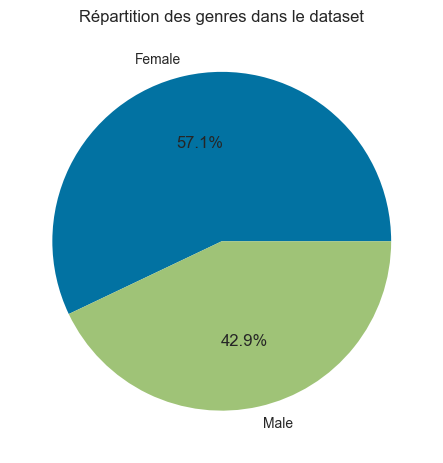

In [183]:
# Diagramme circulaire du genre (gender) avec un histogramme circulaire
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Répartition des genres dans le dataset')
plt.show()

In [184]:
# Creating a contingency table
contingency_table = pd.crosstab(df["gender"],df["smoke"])
print('contingency_table :-\n',contingency_table)

contingency_table :-
 smoke    No  Yes
gender          
Female  731  234
Male    539  187


On remarque d'après cet histogramme circulaire et cette table de contingence (tcontingency_table) qu'il y a plus de femmes que d'hommes dans notre dataset, et plus de femmes fumeuses que d'hommes.

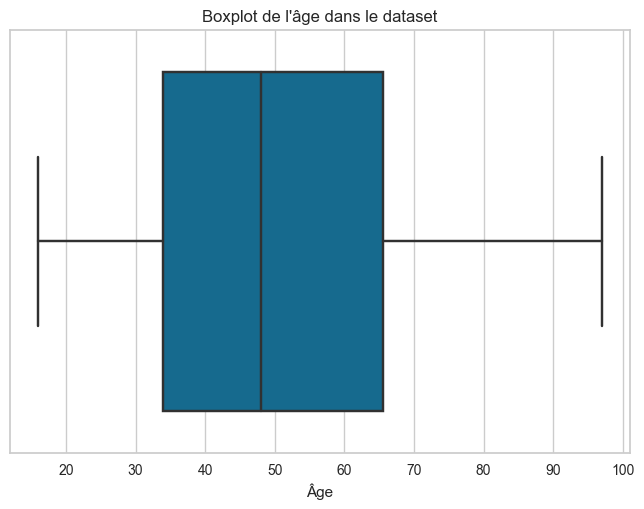

In [185]:
# Boxplot de l'âge avec Seaborn
sns.boxplot(x=df['age'])
plt.xlabel('Âge')
plt.title('Boxplot de l\'âge dans le dataset')
plt.show()

On remarque d'après ce boxplot que la majorité des âges se situent entre 35 et 65 ans.

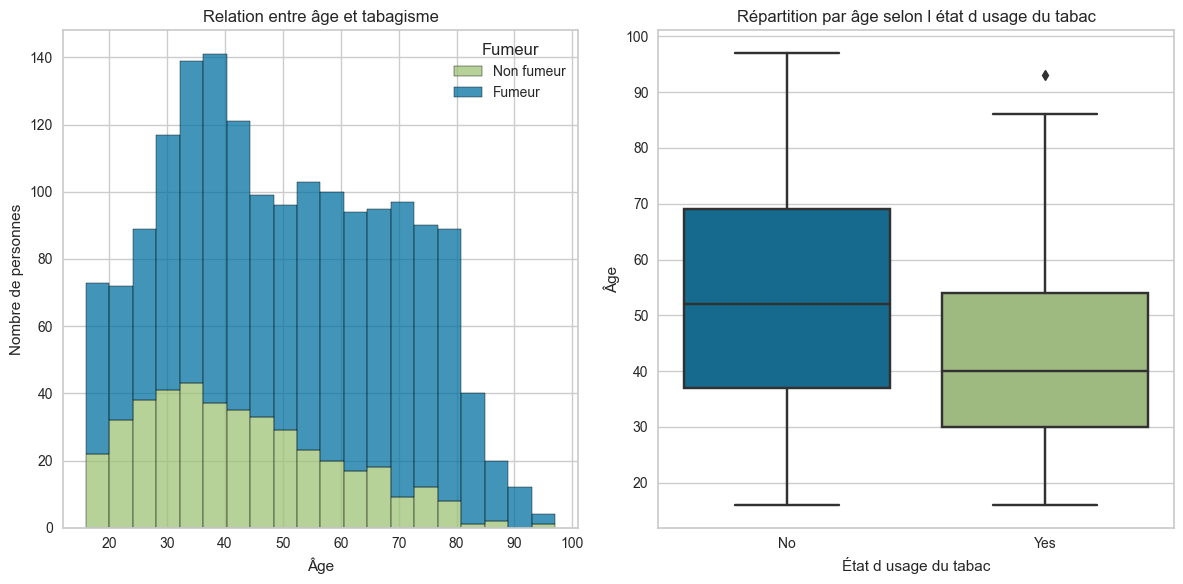

In [186]:
# Créer une figure avec deux sous-graphiques
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Graphique 1 : Relation entre âge et tabagisme avec seaborn histplot
sns.histplot(data=df, x='age', hue='smoke',  multiple='stack', bins=20, ax=axes[0])
axes[0].set_title('Relation entre âge et tabagisme')
axes[0].set_xlabel('Âge')
axes[0].set_ylabel('Nombre de personnes')
axes[0].legend(title='Fumeur', labels=['Non fumeur', 'Fumeur'])

# Graphique 2 : Répartition par âge selon l'état d'usage du tabac avec seaborn boxplot
sns.boxplot(x='smoke', y='age', data=df, ax=axes[1])
axes[1].set_title('Répartition par âge selon l état d usage du tabac')
axes[1].set_xlabel('État d usage du tabac')
axes[1].set_ylabel('Âge')

plt.tight_layout()
plt.show()

In [187]:
contingency_table = pd.crosstab(df["age"],df["smoke"])
print('contingency_table :-\n',contingency_table)

contingency_table :-
 smoke  No  Yes
age           
16     11    4
17      9    4
18     14    8
19      9    2
20      8    4
..     ..  ...
90      3    0
91      2    0
93      1    1
95      1    0
97      1    0

[79 rows x 2 columns]


On remarque, d'après cet histogramme et cette table de contingence (tcontingency_table) qui montre la relation entre l'âge et le tabagisme, que la majorité des fumeurs ont un âge compris entre 20 et 50 ans. Après 50 ans, le pourcentage de fumeurs diminue jusqu'à atteindre presque zéro autour de 80 ans.

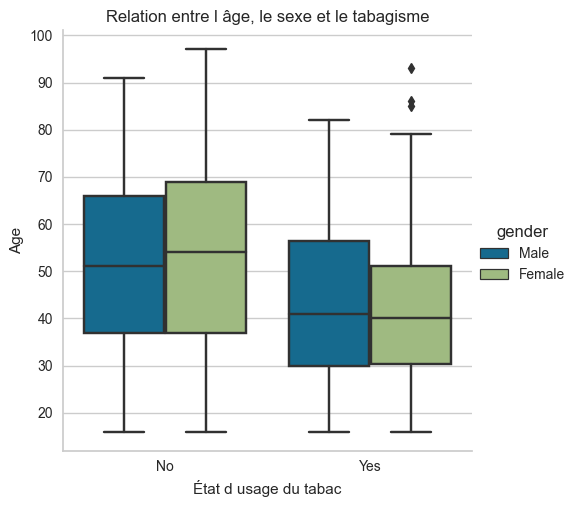

In [188]:
# Analyse multivariée : Âge, Genre et Statut de Fumeur
sns.catplot(x='smoke', y='age', hue='gender', kind='box', data=df)
plt.title('Relation entre l âge, le sexe et le tabagisme')
plt.xlabel('État d usage du tabac')
plt.ylabel('Age')
plt.show()

On remarque que l'âge de la majorité des femmes fumeuses est entre 30 et 57 ans, et celui des hommes fumeurs est entre 30 et 50 ans. En revanche, l'âge des hommes non-fumeurs est compris entre 37 et 67 ans, tandis que celui des femmes non-fumeuses est entre 37 et 70 ans.

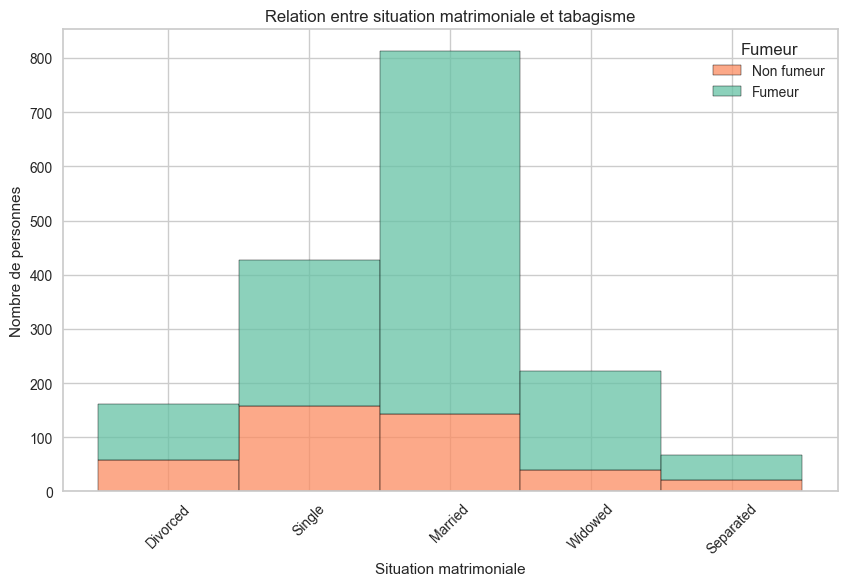

In [189]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='marital_status', hue='smoke', multiple='stack', palette='Set2')
plt.title('Relation entre situation matrimoniale et tabagisme')
plt.xlabel('Situation matrimoniale')
plt.ylabel('Nombre de personnes')
plt.legend(title='Fumeur', labels=['Non fumeur', 'Fumeur'])
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.show()

In [190]:
contingency_table = pd.crosstab(df["marital_status"],df["smoke"])
print('contingency_table :-\n',contingency_table)

contingency_table :-
 smoke            No  Yes
marital_status          
Divorced        103   58
Married         669  143
Separated        46   22
Single          269  158
Widowed         183   40


On remarque d'après cet histogramme et cette table de contingence (tcontingency_table) qui montre la relation entre la situation matrimoniale et le tabagisme que la majorité des fumeurs sont mariés ou célibataires.

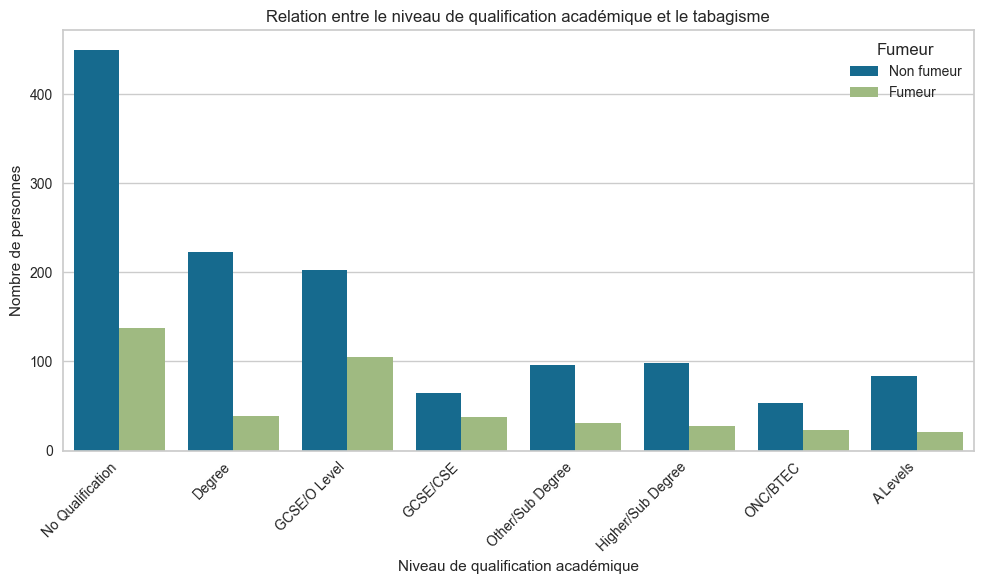

In [191]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='highest_qualification', hue='smoke')
plt.title('Relation entre le niveau de qualification académique et le tabagisme')
plt.xlabel('Niveau de qualification académique')
plt.ylabel('Nombre de personnes')
plt.legend(title='Fumeur', labels=['Non fumeur', 'Fumeur'])
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.tight_layout()  # Ajustement automatique de la disposition du graphique
plt.show()

In [192]:
contingency_table = pd.crosstab(df["highest_qualification"],df["smoke"])
print('contingency_table :-\n',contingency_table)

contingency_table :-
 smoke                   No  Yes
highest_qualification          
A Levels                84   21
Degree                 223   39
GCSE/CSE                64   38
GCSE/O Level           203  105
Higher/Sub Degree       98   27
No Qualification       449  137
ONC/BTEC                53   23
Other/Sub Degree        96   31


On remarque, d'après cet histogramme qui montre la relation entre le niveau de qualification académique et le tabagisme, que la majorité des fumeurs sont sans qualification.

Text(0.5, 1.0, 'Relation entre revenu brut et tabagisme')

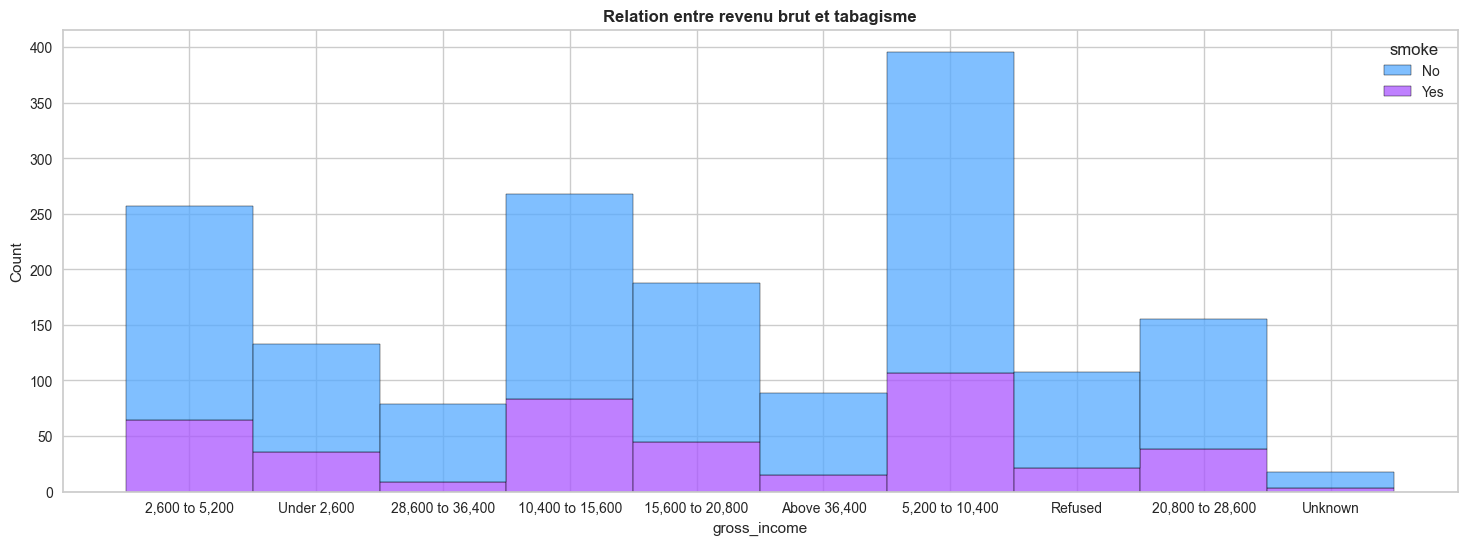

In [193]:
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x="gross_income", hue = "smoke", multiple="stack", palette="cool")
plt.title("Relation entre revenu brut et tabagisme", fontweight="bold")

In [194]:
contingency_table = pd.crosstab(df["gross_income"],df["smoke"])
print('contingency_table :-\n',contingency_table)

contingency_table :-
 smoke              No  Yes
gross_income              
10,400 to 15,600  185   83
15,600 to 20,800  143   45
2,600 to 5,200    193   64
20,800 to 28,600  117   38
28,600 to 36,400   70    9
5,200 to 10,400   289  107
Above 36,400       74   15
Refused            87   21
Under 2,600        97   36
Unknown            15    3


On remarque d'après cet histogramme, qui montre la relation entre le revenu brut et le tabagisme, que le pourcentage de fumeurs diminue au-dessus de 
28.600 €.

Analyse Bivariée et Multivariée

# Machine Learning : Classification binaire Fumeur ou Non-Fumeur ?

In [195]:
# a liste des noms de colonnes du DataFrame
df.columns

Index(['gender', 'age', 'marital_status', 'highest_qualification',
       'nationality', 'ethnicity', 'gross_income', 'region', 'smoke',
       'amt_weekends', 'amt_weekdays', 'type'],
      dtype='object')

In [196]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() #Initialise un objet LabelEncoder appelé le.

# Boucle à travers les colonnes de type 'object' (catégorielles) du DataFrame df.
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col].astype(str)) #le.fit_transform() pour encoder les valeurs de la colonne en valeurs numériques.

In [197]:
# crée un nouveau DataFrame appelé df_smoke
df_smoke = df.loc[:, ['gender', 'age', 'marital_status', 'highest_qualification', 
                      'nationality', 'ethnicity', 'gross_income', 'region', 'smoke']]
# affiche le contenu de la nouvelle Dataframe
df_smoke

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke
0,1,38,0,5,0,6,2,5,0
1,0,42,3,5,0,6,8,5,1
2,1,40,1,1,1,6,4,5,0
3,0,40,1,1,1,6,0,5,0
4,0,39,1,3,0,6,2,5,0
...,...,...,...,...,...,...,...,...,...
1686,1,22,3,5,5,6,2,2,0
1687,0,49,0,7,1,6,2,2,1
1688,1,45,1,7,5,6,5,2,0
1689,0,51,1,5,1,6,2,2,1


In [198]:
df_smoke['smoke'].value_counts()

smoke
0    1270
1     421
Name: count, dtype: int64

# Fixation du Déséquilibre des Données


In [199]:
# Importe la classe SMOTE de la bibliothèque imbalanced-learn pour effectuer la suréchantillonnage synthétique des données.
from imblearn.over_sampling import SMOTE
#Crée une variable X en supprimant la colonne 'smoke' du DataFrame df_smoke
X = df_smoke.drop('smoke', axis=1) # Cette variable contient les caractéristiques
y = df_smoke['smoke'] # Crée une variable y qui contient la variable cible à prédire
smote = SMOTE() # Initialise un objet SMOTE pour effectuer la suréchantillonnage synthétique des données.
X_resampled, y_resampled = smote.fit_resample(X, y) #Applique la méthode fit_resample de l'objet smote pour effectuer le suréchantillonnage synthétique des données.

In [200]:
y_resampled

0       0
1       1
2       0
3       0
4       0
       ..
2535    1
2536    1
2537    1
2538    1
2539    1
Name: smoke, Length: 2540, dtype: int32

In [201]:
y_resampled.value_counts()

smoke
0    1270
1    1270
Name: count, dtype: int64

In [202]:
X_resampled

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region
0,1,38,0,5,0,6,2,5
1,0,42,3,5,0,6,8,5
2,1,40,1,1,1,6,4,5
3,0,40,1,1,1,6,0,5
4,0,39,1,3,0,6,2,5
...,...,...,...,...,...,...,...,...
2535,0,45,1,4,1,6,5,3
2536,0,22,3,3,0,6,5,5
2537,0,23,3,3,0,6,4,5
2538,1,37,1,2,1,6,6,4


In [203]:
#  concatène les données suréchantillonnées des caractéristiques (X_resampled) et de la variable cible (y_resampled) en un seul DataFrame df_resampled.
df_resampled = pd.concat([X_resampled, y_resampled], axis = 1)

In [204]:
df_resampled.head()

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke
0,1,38,0,5,0,6,2,5,0
1,0,42,3,5,0,6,8,5,1
2,1,40,1,1,1,6,4,5,0
3,0,40,1,1,1,6,0,5,0
4,0,39,1,3,0,6,2,5,0


# Classification Binaire avec Pycaret

Diviser le dataframe en train et en test

In [205]:
# diviser le DataFrame df_resampled en deux ensembles, un ensemble d'entraînement (train) et un ensemble de test (test)
train, test = train_test_split(df_resampled, test_size=0.2, random_state=42)
# test_size=0.2 spécifie que 20% des données seront utilisées pour l'ensemble de test, tandis que le reste sera utilisé pour l'ensemble d'entraînement.
# random_state=42 fixe la graine aléatoire pour assurer la reproductibilité de la division des données.

In [206]:
train.shape #Affiche la forme
train.columns #Affiche les noms des colonnes de l'ensemble d'entraînement train

Index(['gender', 'age', 'marital_status', 'highest_qualification',
       'nationality', 'ethnicity', 'gross_income', 'region', 'smoke'],
      dtype='object')

In [207]:
test.shape #Affiche la forme
test.columns # Affiche les noms des colonnes de l'ensemble de test test

Index(['gender', 'age', 'marital_status', 'highest_qualification',
       'nationality', 'ethnicity', 'gross_income', 'region', 'smoke'],
      dtype='object')

In [208]:
from pycaret.classification import * #Importe toutes les fonctionnalités et classes de PyCaret dédiées à la classification

In [209]:
#configurer un environnement de modélisation de machine learning pour la classification
exp_clf102 = setup(data = train, target = 'smoke', session_id=123,  #Spécifie le DataFrame d'entraînement à utiliser pour la modélisation et Indique la variable cible à prédire, ici 'smoke' et Fournit une graine aléatoire pour assurer la reproductibilité des résultats
                  normalize = True, #Normalise les données pour mettre toutes les variables à la même échelle
                  transformation = True, #Effectue une transformation des données pour améliorer la distribution et la performance des modèles
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95, #Supprime les variables présentant une multicollinéarité élevée et Spécifie le seuil de multicollinéarité à 0.95 pour la suppression des variables multicollinéaires.
                  ) 

,Description,Value
0,Session id,123
1,Target,smoke
2,Target type,Binary
3,Original data shape,"(2032, 9)"
4,Transformed data shape,"(2032, 9)"
5,Transformed train set shape,"(1422, 9)"
6,Transformed test set shape,"(610, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [210]:
compare_models() #comparer les performances de différents modèles

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7645,0.8336,0.7970,0.7533,0.7739,0.5285,0.5305,0.1110
xgboost,Extreme Gradient Boosting,0.7574,0.8333,0.7914,0.7473,0.7676,0.5143,0.5172,0.0630
rf,Random Forest Classifier,0.7539,0.8398,0.7873,0.7437,0.7638,0.5073,0.5101,0.0290
et,Extra Trees Classifier,0.7356,0.8212,0.7720,0.7239,0.7461,0.4708,0.4736,0.0280
dt,Decision Tree Classifier,0.7089,0.7078,0.7302,0.7063,0.7171,0.4175,0.4188,0.0060
gbc,Gradient Boosting Classifier,0.7082,0.7880,0.7525,0.6959,0.7227,0.4158,0.4178,0.0200
ada,Ada Boost Classifier,0.6787,0.7481,0.7136,0.6727,0.6917,0.3568,0.3584,0.0140
knn,K Neighbors Classifier,0.6527,0.7080,0.7220,0.6395,0.6767,0.3042,0.3088,0.1980
qda,Quadratic Discriminant Analysis,0.6505,0.6828,0.6942,0.6449,0.6672,0.3003,0.3023,0.0070
lr,Logistic Regression,0.6407,0.6721,0.6802,0.6387,0.6576,0.2806,0.2822,0.2900


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

Visualisez le modèle

In [211]:
model = create_model('rf') #Crée un modèle de classification en utilisant l'algorithme de random forest ('rf') dans PyCaret

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7413,0.8068,0.7222,0.7536,0.7376,0.4826,0.4831
1,0.7203,0.7942,0.7778,0.7000,0.7368,0.4401,0.4429
2,0.8451,0.9160,0.8592,0.8356,0.8472,0.6901,0.6904
3,0.7676,0.8182,0.7778,0.7671,0.7724,0.5350,0.5351
4,0.7817,0.8636,0.7639,0.7971,0.7801,0.5636,0.5641
5,0.7606,0.8612,0.8611,0.7209,0.7848,0.5197,0.5302
6,0.7676,0.8667,0.7917,0.7600,0.7755,0.5348,0.5353
7,0.7465,0.8363,0.7778,0.7368,0.7568,0.4925,0.4932
8,0.7535,0.8580,0.8611,0.7126,0.7799,0.5055,0.5172


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Visualize the Model

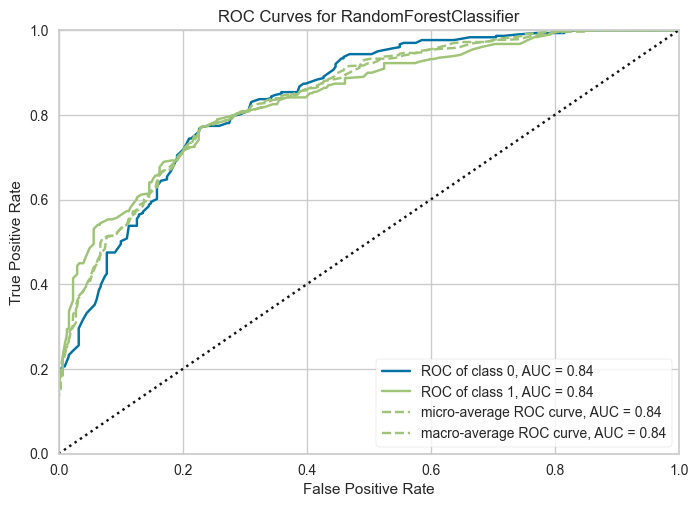

In [212]:
# Trace la courbe ROC du modèle pour évaluer la capacité du modèle à discriminer entre les classes positives et négatives
plot_model(model, plot = 'auc')

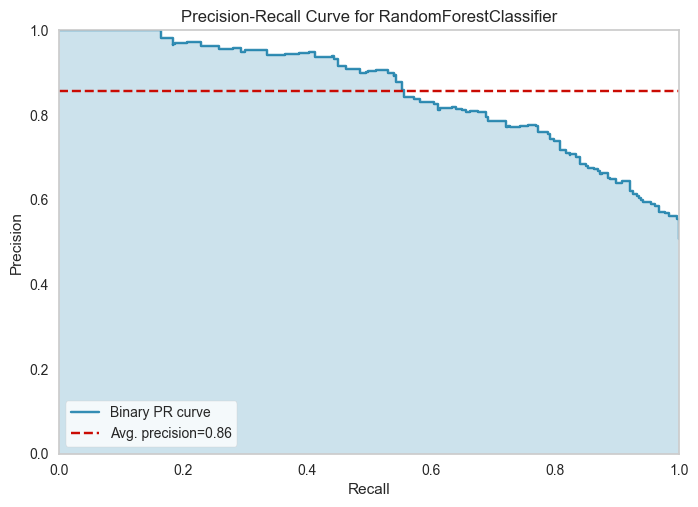

In [213]:
plot_model(model, plot = 'pr') #Trace la courbe de précision-rappel pour évaluer la performance du modèle

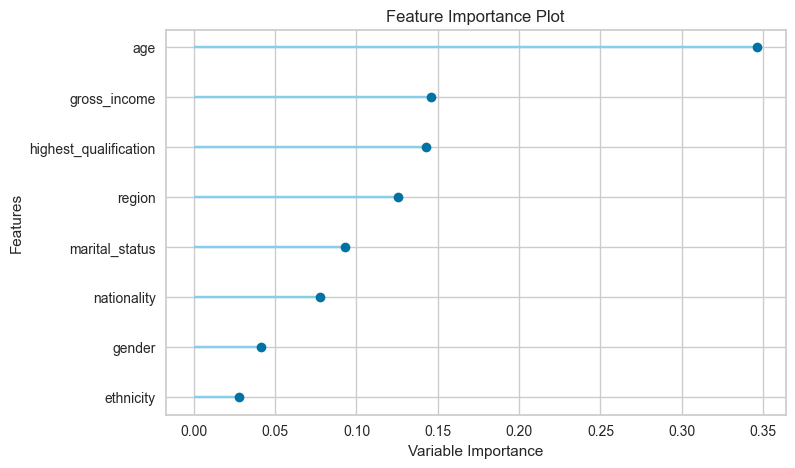

In [214]:
plot_model(model, plot='feature') # visualiser quelles caractéristiques ont le plus d'impact sur les prédictions du modèle

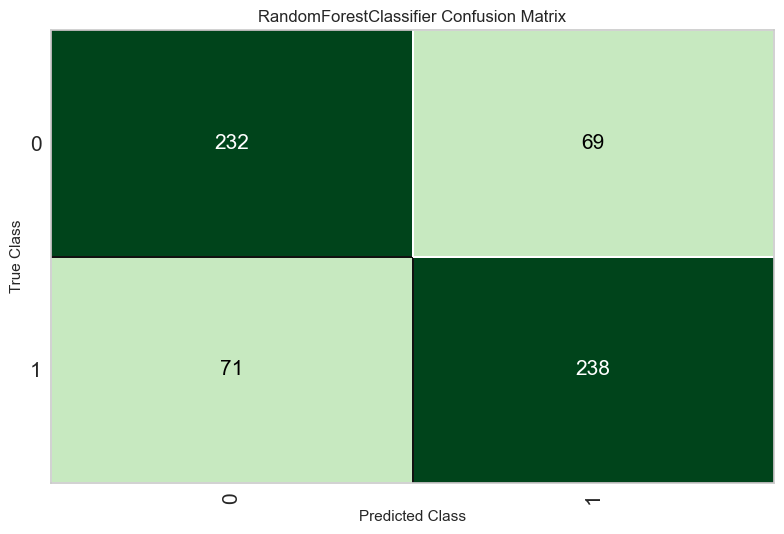

In [215]:
plot_model(model, plot = 'confusion_matrix') #Affiche la matrice de confusion du modèle 

In [216]:
final_rf = finalize_model(model) #Finalise le modèle en utilisant la fonction finalize_model de PyCaret, ce qui peut inclure des étapes telles que l'entraînement final sur toutes les données
final_rf #stocker le modèle final dans la variable final_rf

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['gender', 'age', 'marital_status',
                                             'highest_qualification',
                                             'nationality', 'ethnicity',
                                             'gross_income', 'region'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=100,
                                        n_jobs=-1, oob_score=False,
                                        random_state=123, verbose=0,
                                        warm_start=False))],
         verbose=False)

In [217]:
#  Effectue des prédictions en utilisant le modèle finalisé final_rf sur les données spécifiées et stocke les prédictions dans la variable predictions
predict_model(final_rf); 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9590,0.9902,0.9417,0.9765,0.9588,0.9181,0.9187


In [218]:
# Utilise le modèle finalisé final_rf pour faire des prédictions sur les données de test spécifiées (test) et stocke les prédictions dans la variable unseen_predictions
unseen_predictions = predict_model(final_rf, data=test)
# Affiche les premières lignes du DataFrame unseen_predictions
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7441,0.8393,0.7603,0.7188,0.7390,0.4884,0.4891


,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,prediction_label,prediction_score
1557,0,42,1,1,0,6,0,2,0,0,0.62
134,1,43,0,5,0,6,0,5,1,1,0.85
1639,0,69,4,5,5,6,5,2,0,0,0.50
1498,0,25,1,6,0,0,5,6,0,0,0.73
1399,0,31,3,2,1,6,0,4,0,1,0.75


Les résultats de la prédiction montrent que le modèle finalisé (Random Forest Classifier) a une exactitude (Accuracy) de 74,41% et une AUC de 83,93%. Il a également une bonne capacité à prédire les fumeurs (Recall de 76,03%) et une précision de 71,88%. Le F1-score de 73,90% indique un équilibre entre rappel et précision. Les métriques Kappa (0,4884) et MCC (0,4891) montrent une modérée à substantielle concordance entre les prédictions du modèle et les observations réelles. Les exemples de prédictions montrent les caractéristiques des individus (genre, âge, statut matrimonial, etc.) ainsi que la prédiction du modèle et le score de confiance associé à chaque prédiction.